In [1]:
# 영상처리와 수치 계산을 위한 라이브러리 불러오기
import numpy as np
import cv2
import matplotlib.pyplot as plt

In [3]:
# 구글 Colab에서는 이미지를 직접 업로드하거나 경로를 지정해야 합니다.
# 아래 코드는 파일 업로드 창을 띄웁니다.
from google.colab import files
uploaded = files.upload()

# candies.png 이미지를 불러옵니다.
src = cv2.imread('/content/lenna.bmp', cv2.IMREAD_COLOR)

if src is None:
    print('Image load failed!')
else:
    print('src.shape:', src.shape)  # 이미지 크기 및 채널 확인
    print('src.dtype:', src.dtype)  # 데이터 타입 확인

Saving lenna.bmp to lenna (1).bmp
src.shape: (512, 512, 3)
src.dtype: uint8


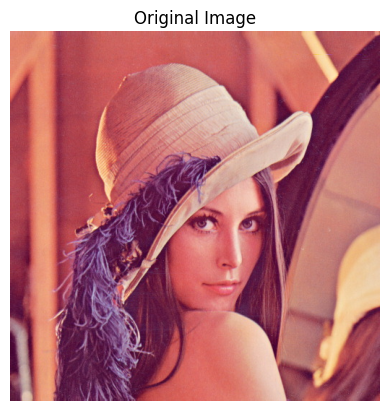

In [4]:
# OpenCV는 BGR 순서이므로, matplotlib로 보여주기 위해 RGB로 변환합니다.
src_rgb = cv2.cvtColor(src, cv2.COLOR_BGR2RGB)

plt.imshow(src_rgb)
plt.title('Original Image')
plt.axis('off')
plt.show()

In [5]:
# BGR 컬러 이미지를 HSV 색 공간으로 변환합니다.
src_hsv = cv2.cvtColor(src, cv2.COLOR_BGR2HSV)
print('HSV shape:', src_hsv.shape)

HSV shape: (512, 512, 3)


In [6]:
# HSV의 각 채널(평면) 분리: H, S, V
h_plane = src_hsv[:, :, 0]  # Hue(색상)
s_plane = src_hsv[:, :, 1]  # Saturation(채도)
v_plane = src_hsv[:, :, 2]  # Value(명도)

print('Hue plane shape:', h_plane.shape)
print('Saturation plane shape:', s_plane.shape)
print('Value plane shape:', v_plane.shape)

Hue plane shape: (512, 512)
Saturation plane shape: (512, 512)
Value plane shape: (512, 512)


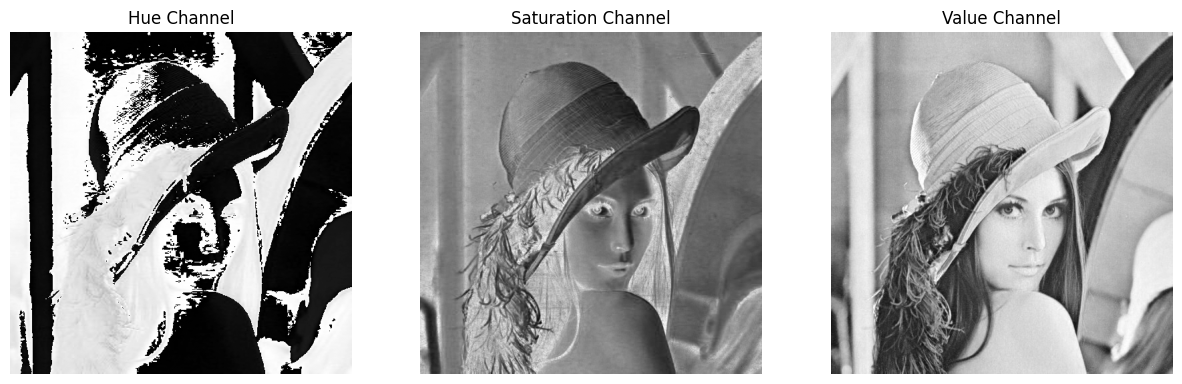

In [7]:
# 각 HSV 평면을 시각화합니다.
fig, axes = plt.subplots(1, 3, figsize=(15,5))
axes[0].imshow(h_plane, cmap='gray')
axes[0].set_title('Hue Channel')
axes[1].imshow(s_plane, cmap='gray')
axes[1].set_title('Saturation Channel')
axes[2].imshow(v_plane, cmap='gray')
axes[2].set_title('Value Channel')
for ax in axes:
    ax.axis('off')
plt.show()

HSV는 색을 표현하는 한 방법입니다.

H : Hue (색상, 색깔)

S : Saturation (채도, 선명함)

V : Value (명도, 밝기)

원래 이미지는 컴퓨터에서 BGR(혹은 RGB)로 저장됩니다.
HSV로 변환하면 사람의 눈이 색을 인식하는 방식과 더 비슷하게 색을 다룰 수 있습니다.

① Hue (색상)
색깔 그 자체를 의미합니다.
0~179 (OpenCV 기준) 사이의 값을 가지며, 각 값은 특정 색을 나타냅니다.
0 : 빨강
60 : 초록
120 : 파랑
30 : 노랑 등

색상환(색깔 원)에서의 각도처럼 생각할 수 있습니다.

Hue 값을 흑백(Grayscale) 이미지로 보여줍니다.
즉, 각 픽셀의 '색상' 정보(0~179, OpenCV 기준)를 밝기로 변환하여 표시합니다.
0에 가까운 값: 검은색
중간 값: 회색
최대값(179): 흰색

② Saturation (채도)
색의 강도 또는 선명함을 나타냅니다.
0이면 회색(무채색), 값이 커질수록 색이 더 진하고 뚜렷해집니다.
범위: 0~255

③ Value (명도)
색의 밝기를 의미합니다.
0이면 완전히 검은색, 255면 완전히 밝은색(흰색 혹은 색의 최대 밝기)
범위: 0~255

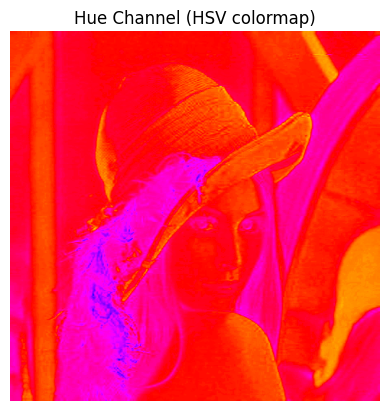

In [8]:
plt.imshow(h_plane, cmap='hsv')  # 실제 색상에 대응하는 컬러맵
plt.title('Hue Channel (HSV colormap)')
plt.axis('off')
plt.show()

이렇게 하면,

빨간색 영역은 빨강
초록색 영역은 초록
파란색 영역은 파랑
등 실제 색상처럼 보입니다.

cmap='gray'로 시각화하면 값의 크기만 밝기로 변환 → 흑백(검-회-흰) 이미지

Hue 값이 실제 색상과 대응되려면 cmap='hsv'를 써야 함